In [4]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [6]:
zip_path = r'D:\Semester 4\CCI\dataset\TomAndJerry.zip'
extract_path = r'D:\Semester 4\CCI\dataset\TomAndJerry'

In [7]:
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
        print("Dataset berhasil diekstrak.")
else:
    print("Folder dataset sudah ada, tidak perlu ekstrak ulang.")

Dataset berhasil diekstrak.


In [8]:
img_width, img_height = 150, 150
batch_size = 32
epochs = 10

In [9]:
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

In [10]:
train_generator = datagen.flow_from_directory(
    extract_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 4383 images belonging to 1 classes.


In [11]:
val_generator = datagen.flow_from_directory(
    extract_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1095 images belonging to 1 classes.


In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

c:\Users\Abiyoso\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Akurasi Validasi: {val_acc:.2f}")

c:\Users\Abiyoso\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\Abiyoso\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\Abiyoso\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received:

35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Akurasi Validasi: 1.00


In [15]:
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

 2/35 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step 

c:\Users\Abiyoso\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step


In [16]:
print("Classification Report:")
print(classification_report(val_generator.classes, y_pred, target_names=val_generator.class_indices.keys()))

Classification Report:
               precision    recall  f1-score   support

tom_and_jerry       1.00      1.00      1.00      1095

     accuracy                           1.00      1095
    macro avg       1.00      1.00      1.00      1095
 weighted avg       1.00      1.00      1.00      1095



c:\Users\Abiyoso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


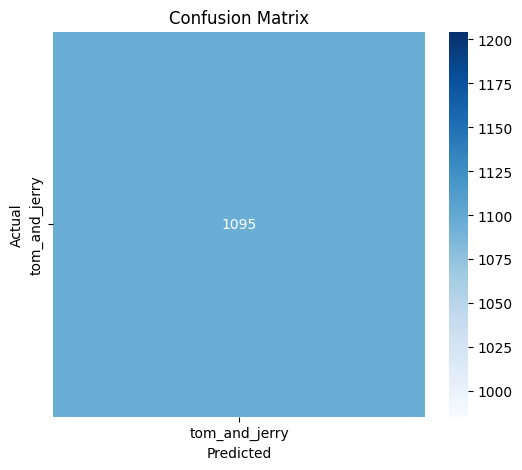

In [17]:
cm = confusion_matrix(val_generator.classes, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()